In [2]:
import pandas as pd
from matplotlib import pyplot as plt  
import seaborn as sns  
%matplotlib inline 



In [3]:
df = pd.read_csv('Desktop/ML/howpop_train.csv')

In [4]:
df.shape


(134137, 17)

In [5]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [6]:
df.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
count,134137.000000,134137.000000,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000,134137.000000,134137.000000,134137.000000
mean,181307.054265,7516.929699,39.625994,71.999866,1.663101e+04,35.536888,8.050035,0.004849,0.003402,-0.003675
std,81766.350702,8724.771640,62.398958,145.854135,3.147982e+04,42.461073,11.398282,1.002158,1.002778,1.005259
min,18284.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000,-6.615254,-4.137662,-4.161967
25%,115565.000000,2179.000000,7.000000,8.000000,2.100000e+03,11.000000,2.000000,-0.706552,-0.695780,-0.633775
50%,182666.000000,4949.000000,19.000000,27.000000,7.600000e+03,22.000000,5.000000,-0.020934,0.007022,0.072082
75%,257401.000000,9858.000000,48.000000,78.000000,1.870000e+04,45.000000,10.000000,0.682689,0.708778,0.697072
max,314088.000000,352471.000000,2266.000000,8718.000000,1.730000e+06,1466.000000,445.000000,5.182821,4.872866,3.900973


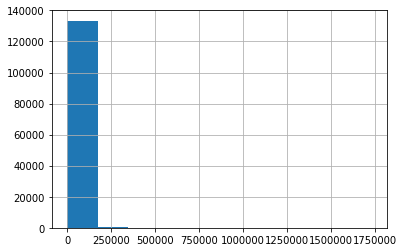

In [7]:
df['views'].hist();

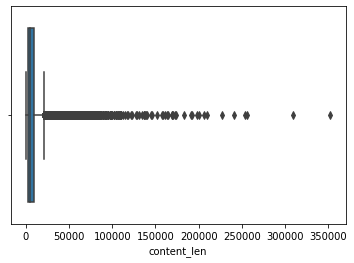

In [8]:
sns.boxplot(df['content_len']);

In [9]:
df['flow'].value_counts()

develop       53318
misc          23104
admin          7902
management     6815
design         3320
marketing      2589
Name: flow, dtype: int64

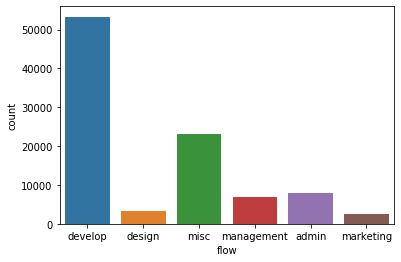

In [10]:
sns.countplot(df['flow']);

In [11]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [12]:
pd.datetime?

In [13]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

### 1. В каком месяце (и какого года) было больше всего публикаций?
март 2016

март 2015

апрель 2015

апрель 2016

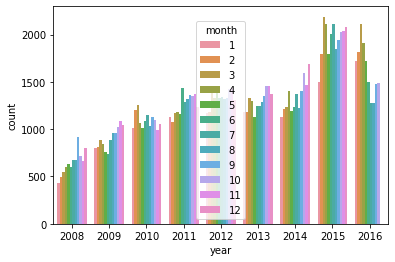

In [14]:
sns.countplot(x='year', hue='month',  data = df);

### 2. Проанализируйте публикации в месяце из предыдущего вопроса
Выберите один или несколько вариантов:

-Один или несколько дней сильно выделяются из общей картины

-На хабре всегда больше статей, чем на гиктаймсе

-По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

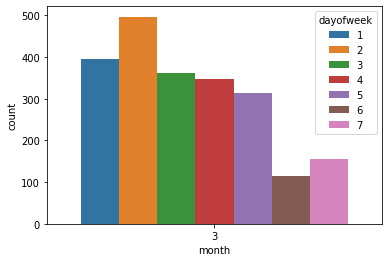

In [15]:
sns.countplot(x='month', hue = 'dayofweek', data = df[(df['month'] == 3) & (df['year'] == 2015)]);

### 3. Когда лучше всего публиковать статью?
Больше всего просмотров набирают статьи, опубликованные в 12 часов дня

У опубликованных в 10 утра постов больше всего комментариев

Больше всего просмотров набирают статьи, опубликованные в 6 часов утра

Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера

На хабре дневные статьи комментируют чаще, чем вечерние

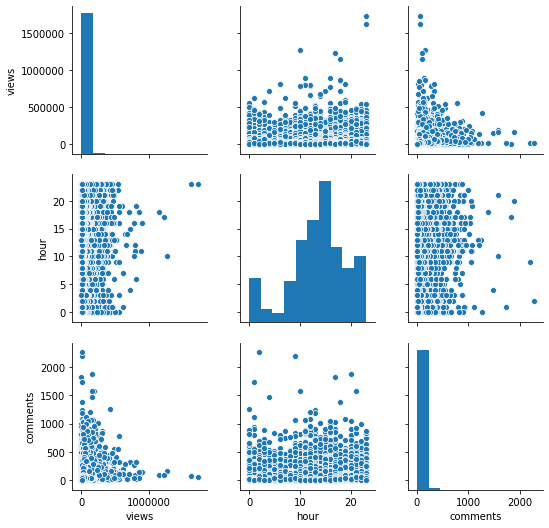

In [16]:
sns.pairplot(df[['views', 'hour', 'comments']]);

### 4. Кого из топ-20 авторов чаще всего минусуют?
@Mordatyj

@Mithgol

@alizar

@ilya42


In [17]:
#@alizar
df['top_auth'] = df.sort_values(by='votes_plus', ascending=False)['author'].head(19)
df.pivot_table(['votes_minus'], ['top_auth'])

,votes_minus
top_auth,
@ArKaz,5.0
@ArtemSmirnov,39.0
@Mairon,75.0
@PapaBubaDiop,10.0
@Zelenyikot,8.0
@Zevaka,43.0
@alizar,14.0
@andorro,142.5
@devaka,184.0


### 5. Сравните субботы и понедельники
Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?


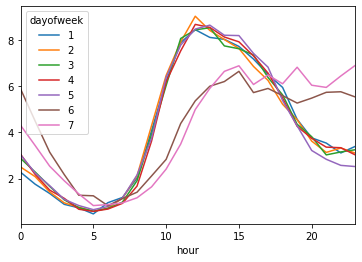

In [52]:
adf = df.pivot_table(index='hour', values='title', aggfunc='count', columns='dayofweek')
adf.apply(lambda x: 100. *x/adf.sum(), axis=1).plot();

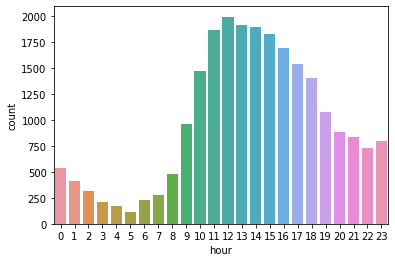

In [54]:
pondf=df[df['dayofweek']==1]['hour']
subdf=df[df['dayofweek']==6]['hour']
sns.countplot(x=pondf, data=df); 

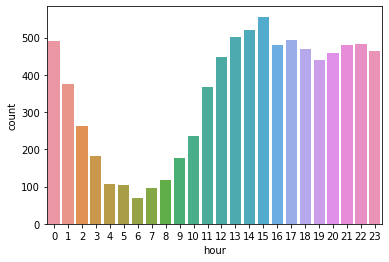

In [57]:

sns.countplot(x=subdf, data=df)

In [30]:
df[df['post_id']==134136]

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,...,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm,year,month,dayofweek,hour,top_auth
45709,https://geektimes.ru/post/134136/,geektimes.ru,134136,2011-12-06 22:37:00,@jeston,NaN,False,2052,10 млрд загрузок из Android Market и сверхдеше...,94,...,70.0,11.0,-0.719344,0.748202,0.882373,2011,12,2,22,NaN
